 # Статистический анализ

## Описание проекта, постановка цели и план работы

Нам передали данные от популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. В основных данных есть информация о пользователях, их поездках и подписках. 

Цель данного проекта  проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Для этого нам необходимо загрузить данные и изучить общую информацию о каждом датафрейме. 
После проверить наличие пропущенных значений и дубликатов в датафреймах, обработать их, если такие значения присутствуют.
Произвести исследовательский анализ на основе информации о пользователях и их поездках: частота встречаемости городов, возраст пользователей и т.д.
Сравнить показатели расстояния и времени поездок по пользователям с подпиской и без нее.
Вывести данные по прибыли от пользователей двух категорий.
И рассмотреть некоторые гипотезы и постараться ответить на вопросы: Тратят ли пользователи с подпиской больше времени на поездки? Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?


## Обзор данных

In [1]:
#импорт библиотеки pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import sqrt
import seaborn as sns

In [2]:
#cчитывание CSV-файла с данными с помощью библиотеки pandas и сохранение в датафрейм
user = pd.read_csv('/datasets/users_go.csv')

In [3]:
#выведение первых 10 строчек датафрейма методом head()
user.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
#выведение основной информации по датафрейму методом info()
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
#cчитывание CSV-файла с данными с помощью библиотеки pandas и сохранение в датафрейм
distance = pd.read_csv('/datasets/rides_go.csv')

In [6]:
#выведение первых 10 строчек датафрейма методом head()
distance.tail(10)

,user_id,distance,duration,date
18058,1534,195.447469,6.469074,2021-06-11
18059,1534,3214.021065,18.343604,2021-06-18
18060,1534,3644.708038,20.289416,2021-08-08
18061,1534,3977.744996,26.916544,2021-08-20
18062,1534,4928.173852,22.560373,2021-09-13
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27
18067,1534,2371.711192,15.893917,2021-12-29


In [7]:
#выведение основной информации по датафрейму методом info()
distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
#cчитывание CSV-файла с данными с помощью библиотеки pandas и сохранение в датафрейм
subscription_type = pd.read_csv('/datasets/subscriptions_go.csv')

In [9]:
#выведение первых 5 строчек датафрейма методом head()
subscription_type.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
#выведение основной информации по датафрейму методом info()
subscription_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Комментарий:**    *После загрузки данных и просмотрев информацию по каждому датафрему, можем сказать, что в первом датафрейме мы можем найти информацию: id, имя, возраст, город и тип подписки пользователя, объем данных составляет 1565 строчек и 5 столбцов, после выведения информации методом info() так же можем увидеть, что данные без пропусков; во втором датафрейме записана информация: id, расстояние, продолжительность и дата поездки пользователя, объем данных составляет 18068 строчек и 4 столбца, после выведения информации методом info() так же можем увидеть, что данные без пропусков; в третьем условия подписки и без нее, объем данных в 2 строчки и 4 столбца, после выведения информации методом info() так же можем увидеть, что данные без пропусков.*

## Предобработка данных

### Изменение типов данных

In [11]:
#применение к временному столбцу датафрейма метода to_datetime и приведение к типу даты pandas
distance['date'] = pd.to_datetime(distance['date'], format='%Y-%m-%d')

In [12]:
#временной столбец датафрейма 'date' помещаем в класс DatetimeIndex и применяем к нему атрибут month
distance['month'] = pd.DatetimeIndex(distance['date']).month

In [13]:
# выведение временного промежутка данных
date = distance['date'].max() - distance['date'].min()
date

Timedelta('363 days 00:00:00')

### Обработка пропущенных значений

In [15]:
#выведение количества пропущенных значений методом isna()
user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
#выведение количества пропущенных значений методом isna()
distance.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [17]:
#выведение количества пропущенных значений методом isna()
subscription_type.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### Обработка дубликатов

In [18]:
#выведение количества явных дубликатов методом duplicated().sum()
user.duplicated().sum()

31

In [19]:
#удаление явных дубликатов методом drop_duplicates()
user = user.drop_duplicates()

In [20]:
#проверка количества явных дубликатов методом duplicated().sum()
distance.duplicated().sum()

0

**Комментарий:**    *После обзора данных приступаем к предобработке данных, просматриваем по каждому датафрему количество пропущенных значений, как и предполагалось на этапе обзора данных, пропущенных значений не найдено, нам переданы полные данные, в связи с чем получим более точный анализ. После произвели поиск явных дубликатов с дальнейшим их удалением.*

##  Исследовательский анализ данных

### Частота встречаемости городов

In [21]:
user['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

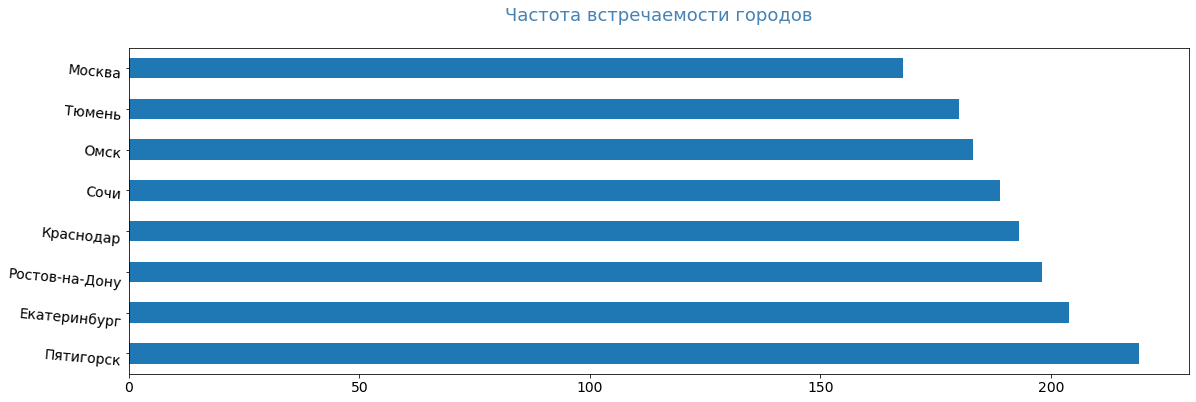

In [22]:
#построение баров с сортировкой по городам
(user['city']
      .value_counts()
      .plot(kind = 'barh',x = 'city', y = 'количество пользователей', figsize = (19,6), rot = -5,
                  legend = False, fontsize = 14)
            .set_title('Частота встречаемости городов' + "\n", fontsize = 18, color = 'SteelBlue')    
        );    

### Соотношение пользователей с подпиской  и без подписки

In [23]:
#формирование df группоривкой значений столбца 'subscription_type' и подсчет кол-ва значений столбца 'user_id' методом agg()
user_subscription = user.groupby('subscription_type', as_index=False).agg({'user_id':'count'})
user_subscription
user_subscription.columns=['тип подписки', 'количество пользователей']
user_subscription

,тип подписки,количество пользователей
0,free,835
1,ultra,699


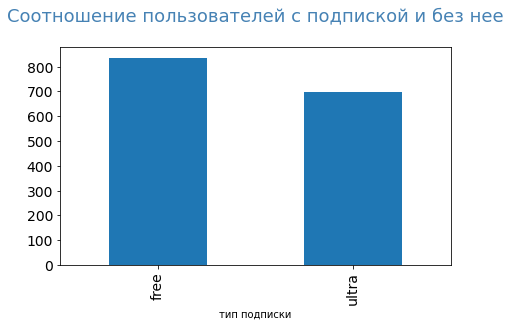

In [24]:
#построение баров по соотношению типов подписок
(user_subscription
            .plot(kind = 'bar',x = 'тип подписки', figsize = (7,4), legend = False, fontsize = 14)
            .set_title('Соотношение пользователей с подпиской и без нее' + "\n", fontsize = 18, color = 'SteelBlue')    
        );   

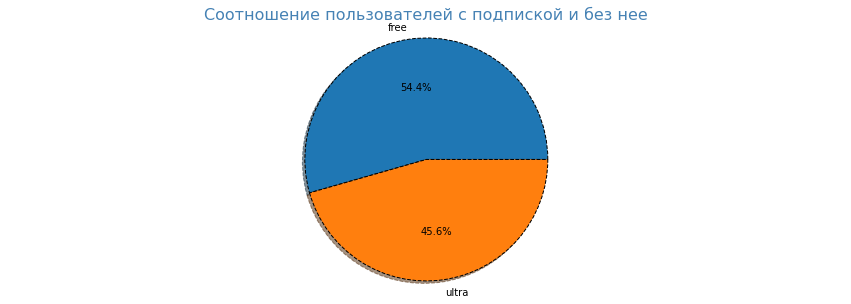

In [25]:
#построение круговой диаграммы с процентным соотношением
user_pie_subscription = user_subscription['тип подписки']
user_pie_count_subscription = user_subscription['количество пользователей']

fig, ax = plt.subplots(figsize = (15,5))
ax.pie(user_pie_count_subscription, labels=user_pie_subscription, autopct='%1.1f%%',  shadow=True, 
       wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'},rotatelabels=False)
ax.axis('equal')
plt.title('Соотношение пользователей с подпиской и без нее',fontsize = 16, color = 'SteelBlue')
plt.show()

### Возраст пользователей

In [26]:
#формирование df группоривкой значений столбца 'age' и подсчет кол-ва значений столбца 'user_id' методом agg() с сортировкой
user_age = (user.groupby('age', as_index=False)
             .agg({'user_id':'count'})
             .sort_values(by='age', ascending=False)
             )
user_age.columns=['возраст', 'количество пользователей']
user_age

,возраст,количество пользователей
28,43,1
27,39,1
26,38,3
25,37,2
24,36,6
23,35,15
22,34,19
21,33,39
20,32,41
19,31,48


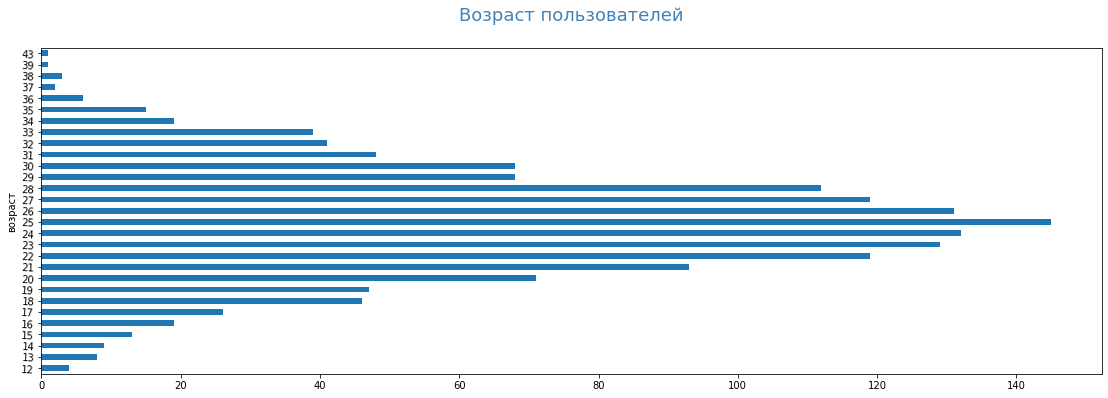

In [27]:
#построение баров по df
(user_age
            .sort_values(by = 'возраст', ascending = True)
            .plot(kind = 'barh',x = 'возраст', y = 'количество пользователей', figsize = (19,6), rot = -3,
                  legend = False, fontsize = 10)
            .set_title('Возраст пользователей' + "\n", fontsize = 18, color = 'SteelBlue')    
        );    

### Расстояние, которое пользователь преодолел за одну поездку

In [28]:
#округление значений столбца 'distance' методом round()
distance['distance'] = round(distance['distance'],1)

In [29]:
#описательная характеристика значений столбца 'distance'
distance['distance'].describe()

count    18068.000000
mean      3070.659841
std       1116.831106
min          0.900000
25%       2543.200000
50%       3133.600000
75%       3776.225000
max       7211.000000
Name: distance, dtype: float64

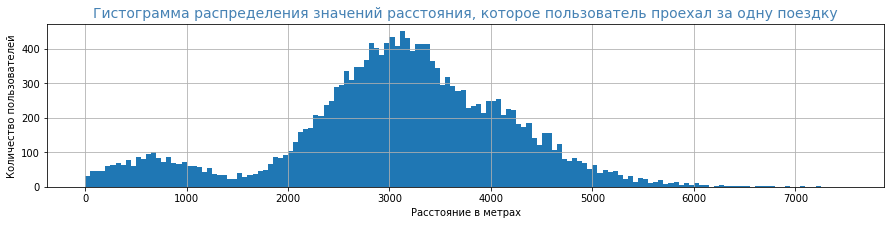

In [30]:
#построение гистограммы по столбцу 'distance' методом hist()
distance['distance'].hist(bins=150, figsize = (15,3), range=(0,7500))
plt.title('Гистограмма распределения значений расстояния, которое пользователь проехал за одну поездку', fontsize=14,
          color='SteelBlue')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.show()

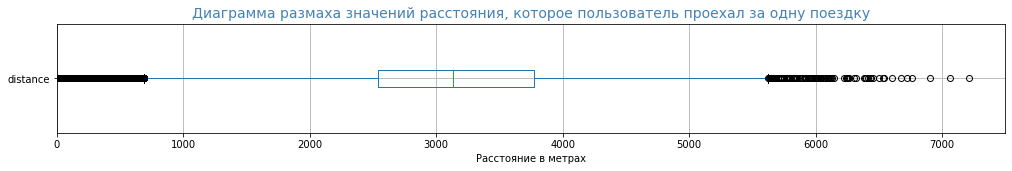

In [31]:
#построения ящика с усами по значениям столбца 'distance'
fig, ax = plt.subplots(figsize = (17,2))
ax = distance[['distance']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений расстояния, которое пользователь проехал за одну поездку', fontsize=14, 
             color='SteelBlue')
ax.set_xlabel('Расстояние в метрах')
ax.set_xlim(0, 7500);

### Продолжительность поездок

In [32]:
#округление значений столбца 'duration' методом round()
distance['duration'] = round(distance['duration'],1)

In [33]:
#описательная характеристика значений столбца 'duration'
distance['duration'].describe()

count    18068.000000
mean        17.804920
std          6.091365
min          0.500000
25%         13.600000
50%         17.700000
75%         21.700000
max         40.800000
Name: duration, dtype: float64

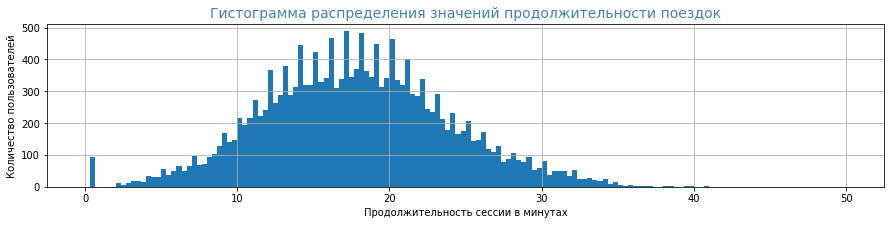

In [34]:
#построение гистограммы по столбцу 'duration' методом hist()
distance['duration'].hist(bins=150, figsize = (15,3), range=(0,50))
plt.title('Гистограмма распределения значений продолжительности поездок', fontsize=14,
          color='SteelBlue')
plt.xlabel('Продолжительность сессии в минутах')
plt.ylabel('Количество пользователей')
plt.show()

In [35]:
#формирование  df c продолжительностью поездки меньше минуты
distance_min = distance[distance['duration'] < 1]
distance_min.head(20)

,user_id,distance,duration,date,month
6531,701,4196.4,0.5,2021-08-31,8
6570,704,4830.8,0.5,2021-10-14,10
6680,712,4684.0,0.5,2021-03-04,3
6695,713,5215.6,0.5,2021-02-25,2
6768,718,5197.4,0.5,2021-02-11,2
6860,724,6225.5,0.5,2021-12-16,12
6883,726,4452.5,0.5,2021-03-01,3
7018,735,4407.0,0.5,2021-04-13,4
7160,745,5286.2,0.5,2021-08-17,8
7364,760,4881.4,0.5,2021-08-29,8


In [36]:
# подсчет значений df методом count()
distance_min.count()

user_id     95
distance    95
duration    95
date        95
month       95
dtype: int64

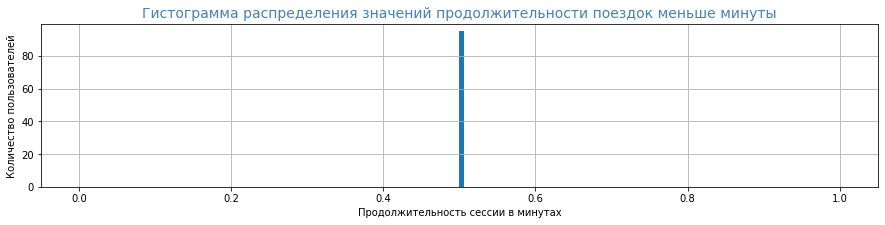

In [37]:
#построение гистограммы по df с поездкой меньше минуты
distance_min['duration'].hist(bins=150, figsize = (15,3))
plt.title('Гистограмма распределения значений продолжительности поездок меньше минуты', fontsize=14,
          color='SteelBlue')
plt.xlabel('Продолжительность сессии в минутах')
plt.ylabel('Количество пользователей')
plt.show()

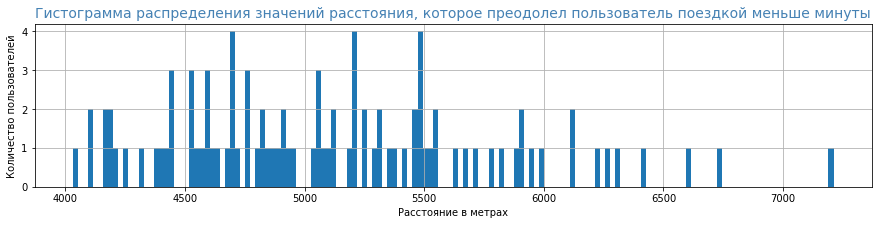

In [38]:
#построение гистограммы распределения расстояния, которое преодалел пользователь в df с продолжительность меньше минуты
distance_min['distance'].hist(bins=150, figsize = (15,3))
plt.title('Гистограмма распределения значений расстояния, которое преодолел пользователь поездкой меньше минуты', fontsize=14,
          color='SteelBlue')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.show()

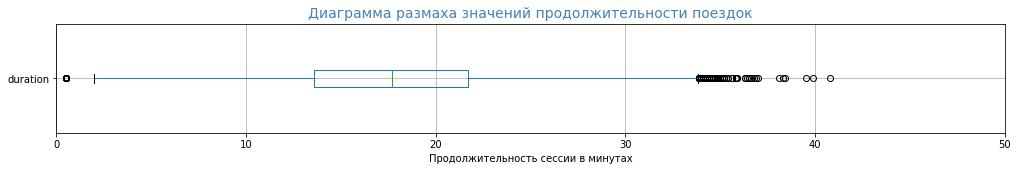

In [39]:
#построения ящика с усами по значениям столбца 'duration'
fig, ax = plt.subplots(figsize = (17,2))
ax = distance[['duration']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений продолжительности поездок', fontsize=14, 
             color='SteelBlue')
ax.set_xlabel('Продолжительность сессии в минутах')
ax.set_xlim(0, 50);

In [40]:
#выведение описательных характеристик 'duration', 'distance'
(
    distance[['duration', 'distance']]
    .apply (['count', 'min', 'median', 'max'])   
    .style.format("{:,.2f}")
)

,duration,distance
count,"18,068.00","18,068.00"
min,0.50,0.90
median,17.70,"3,133.60"
max,40.80,"7,211.00"


**Комментарий:**    *При рассмотрении данных и анализе по частоте встречаемости городов, видим по процентному соотношению, что распредление по городом почти равномерное, больше всего данных из городов Пятигорск, Екатеринбург, Ростов-на-Дону, наименьшее количество пользователей в данных из Москвы.
При анализе соотношения пользователей с подпиской и без подписки в данных видим, что пользователей без подписки больше(54.4%), чем с подпиской(45.6%).
При рассмотрении показателя возраста пользователей в данных, видим что больше всего пользователей в возрасте от 21-28 лет.
При рассмотрении показателя расстояния, которое преодолел пользователь за одну поездку видим, что большее количество значений находится в промежутке от 2500 до 3800 метров. 
При рассмотрении продолжительности поездок можно увидеть, что большиство значений приходится в промежуток от 13 до 22 минут.* 

## Объединение данных

In [41]:
#объединение двух df методом merge() по столбцу 'user_id'
data_new = user.merge(distance, on='user_id')

In [42]:
#объединение двух df методом merge() по столбцу 'subscription_type'
data = data_new.merge(subscription_type, on='subscription_type')

In [43]:
#выведение первых 10 строчек полученного объединением df
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.9,25.6,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.6,15.8,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.2,6.2,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.8,18.5,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.7,26.3,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.9,16.7,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.0,14.9,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.1,23.1,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.7,15.2,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.7,15.0,2021-11-22,11,6,0,199


In [44]:
#выведение количество строк полученного df
data.shape[0]

18068

### Создание и обзор датафреймов пользователей с подпиской и пользователей без подписки

In [45]:
#формирование df пользователей с подпиской методом логической индексации
data_ultra = data.loc[data['subscription_type'] == 'ultra']

In [46]:
#формирование df пользователей без подписки методом логической индексации
data_free = data.loc[data['subscription_type'] == 'free']

#### Расстояние, которое преодолели пользователи с подпиской и без нее

In [47]:
#описательная характеристика значений столбца 'distance'
data_ultra['distance'].describe()

count    6500.000000
mean     3115.444985
std       836.895127
min       244.200000
25%      2785.400000
50%      3148.600000
75%      3560.600000
max      5699.800000
Name: distance, dtype: float64

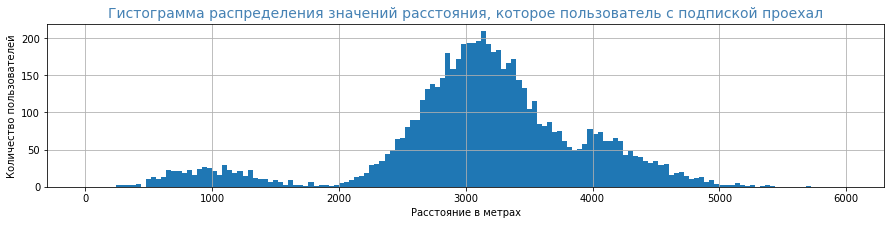

In [48]:
#построение гистограммы по столбцу 'distance' методом hist()
data_ultra['distance'].hist(bins=150, figsize = (15,3), range=(0,6000))
plt.title('Гистограмма распределения значений расстояния, которое пользователь с подпиской проехал',
          fontsize=14, color='SteelBlue')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.show()

In [49]:
#описательная характеристика значений столбца 'distance'
data_free['distance'].describe()

count    11568.000000
mean      3045.495297
std       1246.173747
min          0.900000
25%       2366.600000
50%       3114.650000
75%       3905.700000
max       7211.000000
Name: distance, dtype: float64

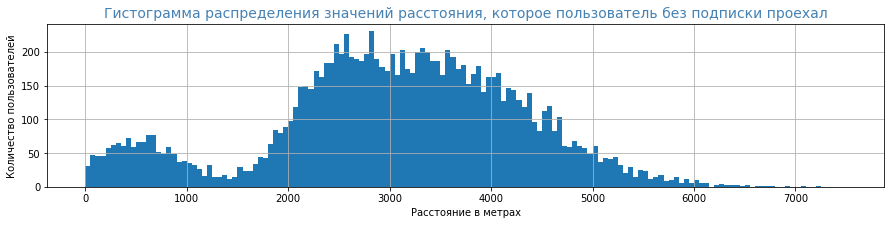

In [50]:
#построение гистограммы по столбцу 'distance' методом hist()
data_free['distance'].hist(bins=150, figsize = (15,3), range=(0,7500))
plt.title('Гистограмма распределения значений расстояния, которое пользователь без подписки проехал', 
          fontsize=14, color='SteelBlue')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.show()

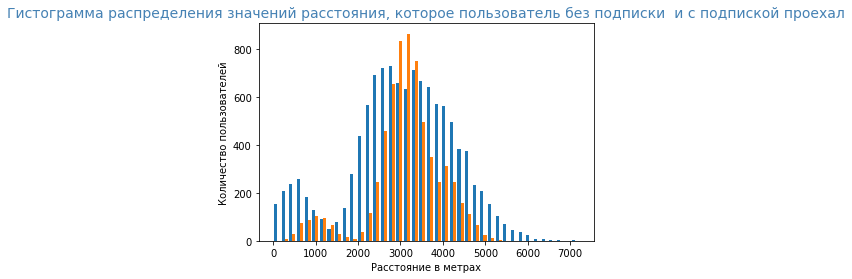

In [51]:
#построение гистограмм по столбцу 'distance' методом hist() по двум df
plt.hist([data_free['distance'], data_ultra['distance'] ], bins=40)
plt.title('Гистограмма распределения значений расстояния, которое пользователь без подписки  и с подпиской проехал', 
          fontsize=14, color='SteelBlue')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.show()

#### Продолжительность поездок пользователей с подпиской и без нее 

In [52]:
#описательная характеристика значений столбца 'duration'
data_ultra['duration'].describe()

count    6500.000000
mean       18.541692
std         5.572126
min         3.800000
25%        14.500000
50%        18.200000
75%        21.900000
max        40.800000
Name: duration, dtype: float64

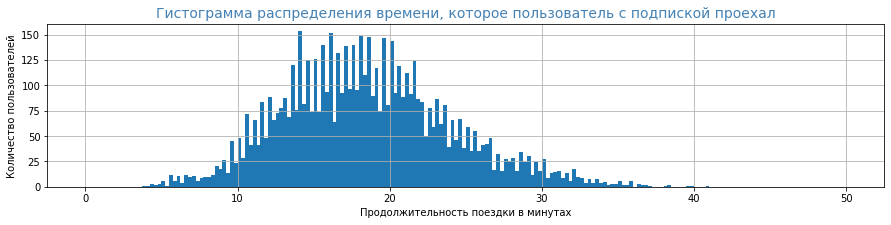

In [53]:
#построение гистограммы по столбцу 'duration' методом hist()
data_ultra['duration'].hist(bins=200, figsize = (15,3), range=(0,50))
plt.title('Гистограмма распределения времени, которое пользователь с подпиской проехал',
          fontsize=14, color='SteelBlue')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Количество пользователей')
plt.show()

In [54]:
#описательная характеристика значений столбца 'duration'
data_free['duration'].describe()

count    11568.000000
mean        17.390932
std          6.327256
min          0.500000
25%         13.000000
50%         17.300000
75%         21.600000
max         34.900000
Name: duration, dtype: float64

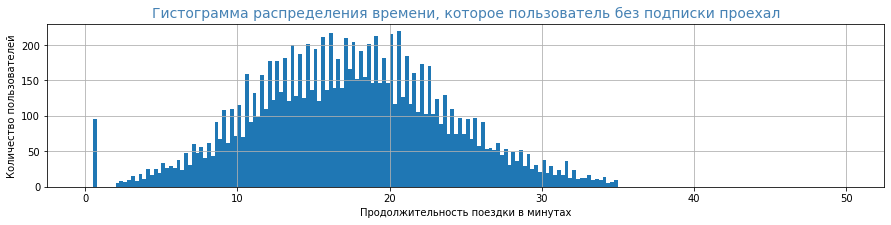

In [55]:
#построение гистограммы по столбцу 'duration' методом hist()
data_free['duration'].hist(bins=200, figsize = (15,3), range=(0,50))
plt.title('Гистограмма распределения времени, которое пользователь без подписки проехал', 
          fontsize=14, color='SteelBlue')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Количество пользователей')
plt.show()

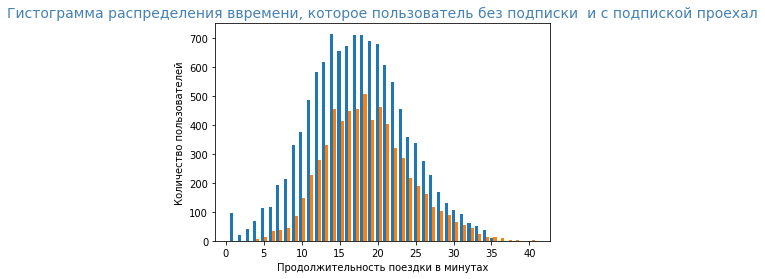

In [56]:
#построение гистограмм по столбцу 'distance' методом hist() по двум df
plt.hist([data_free['duration'], data_ultra['duration'] ], bins=40)
plt.title('Гистограмма распределения ввремени, которое пользователь без подписки  и с подпиской проехал', 
          fontsize=14, color='SteelBlue')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Количество пользователей')
plt.show()

**Комментарий:**    *При проведения сравнительного анализа расстояния и времени поездки двух датафреймов, сформированные на основе показателя подключения подписки, можем увидеть по показателю преодаления расстояния пользователем,если рассматривать небольшие расстояния, то пользователи без подписки чаще пользуются арендой самоката до 1500 метров, чем пользователи с подпиской. Если брать показатели на более длительные расстояния, то можно увидеть распределения значений у пользователей без подписки от 2500 до 4000 метров множественные значения распределены между собой с небольшим разбросом, но если рассматривать данные по пользователям с подпиской, то мы видим выраженное пиковое значение от 3000 до 3200 метров, данные пользватели чаще всего совершают поездки на длительные расстояния в пределах этого значения.
Рассматривая сравнительный анализ длительности поездок двух категорий, то значения распределены равномерно в двух группах. Количество значений в группе без подписки значительно больше, чем у категории с подпиской, медианные значения групп близки к друг другу. Пользователи без подписки совершают больше коротких поездок, так как значения этой группы начинаются раньше (есть аномальные значения в начале графика около 0),, чем пользователи с подпиской, их минимальное значение с 4 минут.*

## Подсчёт выручки

In [57]:
#округление значений столбца 'duration' с помощью метода "потолок" np.ceil()
data['duration'] = np.ceil(data['duration'])

In [58]:
#создание датафрейма с агрегированными данными о поездках на основе data методом groupby() и agg()
data_revenue = (data
              .groupby(['user_id','subscription_type','month'], as_index=False)
              .agg({'distance':['sum','count'], 'duration':'sum'})
             )
data_revenue.columns = ['user_id','subscription_type','month','distance_sum','distance_count','duration_sum']


In [59]:
#объединение двух df методом merge() по столбцу 'subscription_type'
data_revenue = data_revenue.merge(subscription_type, on='subscription_type')
data_revenue.head(10)

,user_id,subscription_type,month,distance_sum,distance_count,duration_sum,minute_price,start_ride_price,subscription_fee
0,1,ultra,1,7027.5,2,42.0,6,0,199
1,1,ultra,4,754.2,1,7.0,6,0,199
2,1,ultra,8,6723.5,2,46.0,6,0,199
3,1,ultra,10,5809.9,2,32.0,6,0,199
4,1,ultra,11,7003.5,3,55.0,6,0,199
5,1,ultra,12,6751.6,2,28.0,6,0,199
6,2,ultra,3,10187.7,3,63.0,6,0,199
7,2,ultra,4,6164.4,2,40.0,6,0,199
8,2,ultra,6,3255.3,1,14.0,6,0,199
9,2,ultra,7,6780.7,2,47.0,6,0,199


In [60]:
#создание нового столбца 'revenue' функцией
def rev(data_revenue):
    if data_revenue['subscription_type'] == 'free':
        data_sum = data_revenue['duration_sum'] * data_revenue['minute_price']
        data_fr = (data_revenue['distance_count'] * data_revenue['start_ride_price']) + data_revenue['subscription_fee']
        return (data_fr + data_sum)
    if data_revenue['subscription_type'] == 'ultra':
        data_sum_ = data_revenue['duration_sum'] * data_revenue['minute_price']
        data_ul = (data_revenue['distance_count'] * data_revenue['start_ride_price']) + data_revenue['subscription_fee']
        return (data_sum_ + data_ul)
   

In [61]:
data_revenue['revenue'] = data_revenue.apply(rev, axis=1)

In [62]:
#вывод последних 10 строчек полученного df
data_revenue.tail(10)

,user_id,subscription_type,month,distance_sum,distance_count,duration_sum,minute_price,start_ride_price,subscription_fee,revenue
11321,1533,free,8,4581.9,1,22.0,8,50,0,226.0
11322,1533,free,11,3414.4,1,26.0,8,50,0,258.0
11323,1534,free,1,4678.4,1,16.0,8,50,0,178.0
11324,1534,free,2,2103.9,1,14.0,8,50,0,162.0
11325,1534,free,4,3434.3,1,15.0,8,50,0,170.0
11326,1534,free,6,3409.4,2,26.0,8,50,0,308.0
11327,1534,free,8,7622.4,2,48.0,8,50,0,484.0
11328,1534,free,9,4928.2,1,23.0,8,50,0,234.0
11329,1534,free,11,13350.0,4,78.0,8,50,0,824.0
11330,1534,free,12,2371.7,1,16.0,8,50,0,178.0


In [63]:
data_revenue_ultra = data_revenue.loc[data_revenue['subscription_type'] == 'ultra']

In [64]:
data_revenue_free = data_revenue.loc[data_revenue['subscription_type'] == 'free']

## Проверка гипотез

**Гипотеза 1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверяем гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

Формулируем двухстороннюю гипотезу:

**Ho** = средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки

**Н1** = средняя продолжительность поездки пользователей с подпиской больше, чем продолжительность поезки у пользоватлей без подписки

In [65]:
alpha = 0.05

results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

print('Средняя продолжительность поездки пользователей с подпиской:', round(data_ultra['duration'].mean(), 1))
print('Средняя продолжительность поездки пользователей без подписки:', round(data_free['duration'].mean(), 1))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя продолжительность поездки пользователей с подпиской: 18.5
Средняя продолжительность поездки пользователей без подписки: 17.4
p-значение: 1.3448182372889e-34
Отвергаем нулевую гипотезу


**Вывод:**  *Слишком маленькая вероятность того, что средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки, в связи с этим отвергаем данную гипотезу в сторону альтернативной: средняя продолжительность поездки пользователей с подпиской больше, чем продолжительность поезки у пользоватлей без подписки.*

**Гипотеза 2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.**

Формулируем одностороннюю гипотезу:

**Ho** = среднее растояние, которое проезжают пользователи с подпиской не превышает 3130 м

**Н1** = среднее растояние, которое проезжают пользователи с подпиской значительно превышает 3130 м

In [66]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    data_ultra['distance'], 
    interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,среднее растояние, которое проезжают пользователи с подпиской значительно превышает 3130 м')
else:
    print('Не получилось отвергнуть нулевую гипотезу, среднее растояние, которое проезжают пользователи с подпиской не превышает 3130 м')

p-значение: 0.9195427368335852
Не получилось отвергнуть нулевую гипотезу, среднее растояние, которое проезжают пользователи с подпиской не превышает 3130 м


**Вывод:** *вероятность данной гипотезы 16%, поэтому вероятнее всего, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров нельзя отвергнуть.*

**Гипотеза 3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.**

Формулируем двухстороннюю гипотезу:

**Ho** = помесячная выручка от пользователей с подпиской по месяцам равна помесячной выручке от пользователей без подписки

**Н1** = помесячная выручка от пользователей с подпиской по месяцам выше, чем у пользователей без подписки

In [67]:
alpha = 0.05

results = st.ttest_ind(data_revenue_ultra['revenue'], data_revenue_free['revenue'], alternative='greater')

print('Средняя выручка пользователей с подпиской:', round(data_revenue_ultra['revenue'].mean(),1))
print('Средняя выручка пользователей без подписки:', round(data_revenue_free['revenue'].mean(), 1))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средняя выручка пользователей с подпиской: 362.4
Средняя выручка пользователей без подписки: 328.0
p-значение: 5.015631474144602e-32
Отвергаем нулевую гипотезу


**Вывод:** *Слишком маленькая вероятность того, что помесячная выручка от пользователей с подпиской по месяцам равна помесячной выручке от пользователей без подписки в связи с этим данная гипотеза отвергнута в сторону альтернативной гипотезы, что помесячная выручка от пользователей с подпиской по месяцам выше, чем у пользователей без подписки.*

## Вывод

Нам передали данные от популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

*После загрузки данных и их обзоре* видим информацию о пользователях, их поездках и подписках. Данные состоят из трех датафремов, где в первом мы можем найти информацию: id, имя, возраст, город и тип подписки пользователя; во втором: id, расстояние, продолжительность и дату поездки; в третьем условия подписки и без нее. 

После обзора данных приступили к *предобработке данных*, просматривая по каждому датафрему количество пропущенных значений, пропущенных знанений не найдено, нам переданы полные данные, в связи с чем получим более точный анализ. После произвели поиск явных дубликатов с дальнейшим их удалением.

С обработанными данными произвели *исследовательский анализ*. При рассмотрении данных и анализе **по частоте встречаемости городов, видим по процентному соотношению, что распредление по городом почти равномерное, больше всего данных из городов Пятигорск, Екатеринбург, Ростов-на-Дону, наименьшее количество пользователей в данных из Москвы.**
При анализе соотношения пользователей с подпиской и без подписки в данных видим, что **пользователей без подписки больше(54.4%), чем с подпиской(45.6%).**
При рассмотрении показателя возраста пользователей в данных, видим что больше **всего пользователей в возрасте от 21-28 лет.**
При рассмотрении показателя расстояния, которое **преодолел пользователь за одну поездку видим, что большее количество значений находится в промежутке от 2500 до 3800 метров.**
При рассмотрении **продолжительности поездок можно увидеть, что большиство значений приходится в промежуток от 13 до 22 минут.**  

При проведения *сравнительного анализа* расстояния и времени поездки двух датафреймов, сформированные на основе показателя подключения подписки, можем увидеть по показателю преодаления расстояния пользователем,если рассматривать **небольшие расстояния, то пользователи без подписки чаще пользуются арендой самоката до 1500 метров, чем пользователи с подпиской.** Если брать показатели на более длительные расстояния, то можно увидеть распределения значений у пользователей без подписки от 2500 до 4000 метров множественные значения распределены между собой с небольшим разбросом, но если рассматривать данные по пользователям с подпиской, то мы видим выраженное пиковое **значение от 3000 до 3200 метров, данные пользователи(с подпиской) чаще всего совершают поездки на длительные расстояния в пределах этого значения.**
Рассматривая сравнительный анализ длительности поездок двух категорий, то значения распределены равномерно в двух группах. Количество значений в группе без подписки значительно больше, чем у категории с подпиской, **медианные значения продолжительности поездок групп близки к друг другу.** Пользователи без подписки совершают больше коротких поездок, так как значения этой группы начинаются раньше (есть аномальные значения в начале графика около 0), чем пользователи с подпиской, их минимальное значение с 4 минут.

Далее рассматривали *ряд гипотез*. Первая гипотеза: тратят ли пользователи с подпиской больше времени на поездки?
Мы получили слишком маленькую вероятность того, что средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки, в связи с этим отвергли данную гипотезу в сторону альтернативной: **средняя продолжительность поездки пользователей с подпиской больше, чем продолжительность поезки у пользоватлей без подписки.**

Вторая гипотеза: Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
**Мы получили вероятность данной гипотезы 16%, поэтому вероятнее всего, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров нельзя отвергнуть. Данная гипотеза подтверждена**

Третья гипотеза: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
Мы получили слишком маленькую вероятность того, что помесячная выручка от пользователей с подпиской по месяцам равна помесячной выручке от пользователей без подписки в связи с этим данную гипотезу отвергнули в сторону альтернативной гипотезы, что **помесячная выручка от пользователей с подпиской по месяцам выше, чем у пользователей без подписки.**

Рекомендации после анализа: **для рассмотрения вектора увеличения пользователей с подпиской, так как данная категория является более выгодной для бизнеса, она приносит больший доход и пользуется услугой для длительных поездок, необходимо провести акционные мероприятия для группы без подписки для привлечения подключения услуги подписки ultra**